In [1]:
critics={
     'hhd':{'guardians of the galaxy 2':5,'christmas in august':4,'boss baby':1.5},
     'chs':{'christmas in august':5,'boss baby':2},
     'kmh':{'guardians of the galaxy 2':2.5,'christmas in august':2,'boss baby':1},
     'leb':{'guardians of the galaxy 2':3.5,'christmas in august':4,'boss baby':5}
}


In [2]:
critics.get('hhd')
 
{'boss baby': 1.5, 'christmas in august': 4, 'guardians of the galaxy 2': 5}

{'boss baby': 1.5, 'christmas in august': 4, 'guardians of the galaxy 2': 5}

In [3]:
critics.get('hhd').get('boss baby')

1.5

In [4]:
from math import sqrt
def sim(i, j):
    return sqrt(pow(i,2)+pow(j,2))

In [6]:
var1 =  critics['chs']['christmas in august']-critics['leb']['christmas in august']
var2 =  critics['chs']['boss baby']-critics['leb']['boss baby']
sim(var1,var2) #위에서 정의한 함수

3.1622776601683795

In [7]:
for i in critics:
    if i!='chs': #자기자신제외
        num1 = critics.get('chs').get('christmas in august')- critics.get(i).get('christmas in august')
        num2 = critics.get('chs').get('boss baby')- critics.get(i).get('boss baby')
        print(i," : ", sim(num1,num2))

hhd  :  1.118033988749895
kmh  :  3.1622776601683795
leb  :  3.1622776601683795


In [8]:
for i in critics:
    if i!='chs':
        num1 = critics.get('chs').get('christmas in august')- critics.get(i).get('christmas in august')
        num2 = critics.get('chs').get('boss baby')- critics.get(i).get('boss baby')
        print(i," : ", 1/(1+sim(num1,num2))) #정규화

hhd  :  0.4721359549995794
kmh  :  0.2402530733520421
leb  :  0.2402530733520421


In [9]:
def sim_distance(data, name1, name2):
    sum=0
    for i in data[name1]:
        if i in data[name2]: #같은 영화를 봤다면
            sum+=pow(data[name1][i]- data[name2][i],2)
        
    return 1/(1+sqrt(sum))

In [10]:
sim_distance(critics, 'chs','leb')

0.2402530733520421

In [11]:
def top_match(data, name, index=3, sim_function=sim_distance):
    li=[]
    for i in data:
        if name!=i: #자기 자신은 제외한다
            li.append((sim_function(data,name,i),i)) # 유사도, 이름을 튜플에 묶어 리스트에 추가한다
    li.sort() #오름차순 정렬
    li.reverse() #내림차순 정렬
    
    return li[:index]


In [40]:
top_match(critics, 'chs')

li=top_match(critics, 'chs')
score=[]
names=[]
for i in li:
    score.append(i[0])
    names.append(i[1])

In [41]:
score

[0.4721359549995794, 0.2402530733520421, 0.2402530733520421]

In [42]:
names

['hhd', 'leb', 'kmh']

In [43]:
import matplotlib.pyplot as plt
def barchart(data, labels): # data, labels는 list형태로 사용
    positions = range(len(data))
    plt.barh(positions, data, height=0.5,color='r') #가로
    plt.yticks(positions, labels)
    plt.xlabel('similarity') #x축
    plt.ylabel('name') #y축
    #plt_show #출력
    


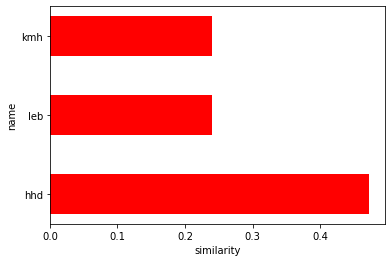

In [39]:
barchart(score, names)